In [88]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
loans_df = pd.read_csv('loans_full_schema.csv')
loans_df.head(10)

,emp_title,emp_length,state,homeownership,annual_income,verified_income,debt_to_income,annual_income_joint,verification_income_joint,debt_to_income_joint,...,sub_grade,issue_month,loan_status,initial_listing_status,disbursement_method,balance,paid_total,paid_principal,paid_interest,paid_late_fees
0,global config engineer,3.0,NJ,MORTGAGE,90000.0,Verified,18.01,NaN,NaN,NaN,...,C3,Mar-2018,Current,whole,Cash,27015.86,1999.33,984.14,1015.19,0.0
1,warehouse office clerk,10.0,HI,RENT,40000.0,Not Verified,5.04,NaN,NaN,NaN,...,C1,Feb-2018,Current,whole,Cash,4651.37,499.12,348.63,150.49,0.0
2,assembly,3.0,WI,RENT,40000.0,Source Verified,21.15,NaN,NaN,NaN,...,D1,Feb-2018,Current,fractional,Cash,1824.63,281.80,175.37,106.43,0.0
3,customer service,1.0,PA,RENT,30000.0,Not Verified,10.16,NaN,NaN,NaN,...,A3,Jan-2018,Current,whole,Cash,18853.26,3312.89,2746.74,566.15,0.0
4,security supervisor,10.0,CA,RENT,35000.0,Verified,57.96,57000.0,Verified,37.66,...,C3,Mar-2018,Current,whole,Cash,21430.15,2324.65,1569.85,754.80,0.0
5,NaN,NaN,KY,OWN,34000.0,Not Verified,6.46,NaN,NaN,NaN,...,A3,Jan-2018,Current,whole,Cash,4256.71,873.13,743.29,129.84,0.0
6,hr,10.0,MI,MORTGAGE,35000.0,Source Verified,23.66,155000.0,Not Verified,13.12,...,C2,Jan-2018,Current,whole,Cash,22560.00,2730.51,1440.00,1290.51,0.0
7,police,10.0,AZ,MORTGAGE,110000.0,Source Verified,16.19,NaN,NaN,NaN,...,B5,Jan-2018,Current,whole,Cash,19005.39,1765.84,994.61,771.23,0.0
8,parts,10.0,NV,MORTGAGE,65000.0,Source Verified,36.48,NaN,NaN,NaN,...,C2,Feb-2018,Current,whole,Cash,18156.66,2703.22,1843.34,859.88,0.0
9,4th person,3.0,IL,RENT,30000.0,Not Verified,18.91,NaN,NaN,NaN,...,A3,Mar-2018,Current,fractional,Cash,6077.13,391.15,322.87,68.28,0.0


In [61]:
loans_df.columns

Index(['emp_title', 'emp_length', 'state', 'homeownership', 'annual_income',
       'verified_income', 'debt_to_income', 'annual_income_joint',
       'verification_income_joint', 'debt_to_income_joint', 'delinq_2y',
       'months_since_last_delinq', 'earliest_credit_line',
       'inquiries_last_12m', 'total_credit_lines', 'open_credit_lines',
       'total_credit_limit', 'total_credit_utilized',
       'num_collections_last_12m', 'num_historical_failed_to_pay',
       'months_since_90d_late', 'current_accounts_delinq',
       'total_collection_amount_ever', 'current_installment_accounts',
       'accounts_opened_24m', 'months_since_last_credit_inquiry',
       'num_satisfactory_accounts', 'num_accounts_120d_past_due',
       'num_accounts_30d_past_due', 'num_active_debit_accounts',
       'total_debit_limit', 'num_total_cc_accounts', 'num_open_cc_accounts',
       'num_cc_carrying_balance', 'num_mort_accounts',
       'account_never_delinq_percent', 'tax_liens', 'public_record_bankr

In [66]:
loans_df.dtypes

emp_title                            object
emp_length                          float64
state                                object
homeownership                        object
annual_income                       float64
verified_income                      object
debt_to_income                      float64
annual_income_joint                 float64
verification_income_joint            object
debt_to_income_joint                float64
delinq_2y                             int64
months_since_last_delinq            float64
earliest_credit_line                  int64
inquiries_last_12m                    int64
total_credit_lines                    int64
open_credit_lines                     int64
total_credit_limit                    int64
total_credit_utilized                 int64
num_collections_last_12m              int64
num_historical_failed_to_pay          int64
months_since_90d_late               float64
current_accounts_delinq               int64
total_collection_amount_ever    

In [34]:
loans_df_status = pd.get_dummies(loans_df[['loan_status']])
loans_df_status

,loan_status_Charged Off,loan_status_Current,loan_status_Fully Paid,loan_status_In Grace Period,loan_status_Late (16-30 days),loan_status_Late (31-120 days)
0,0,1,0,0,0,0
1,0,1,0,0,0,0
2,0,1,0,0,0,0
3,0,1,0,0,0,0
4,0,1,0,0,0,0
...,...,...,...,...,...,...
9995,0,1,0,0,0,0
9996,0,1,0,0,0,0
9997,0,1,0,0,0,0
9998,0,1,0,0,0,0


In [90]:
loans_df.groupby('loan_status').count()

,emp_title,emp_length,state,homeownership,annual_income,verified_income,debt_to_income,annual_income_joint,verification_income_joint,debt_to_income_joint,...,grade,sub_grade,issue_month,initial_listing_status,disbursement_method,balance,paid_total,paid_principal,paid_interest,paid_late_fees
loan_status,,,,,,,,,,,,,,,,,,,,,
Charged Off,6,6,7,7,7,7,7,1,1,1,...,7,7,7,7,7,7,7,7,7,7
Current,8585,8599,9375,9375,9375,9375,9354,1399,1362,1399,...,9375,9375,9375,9375,9375,9375,9375,9375,9375,9375
Fully Paid,419,420,447,447,447,447,445,59,57,59,...,447,447,447,447,447,447,447,447,447,447
In Grace Period,62,63,67,67,67,67,66,17,16,17,...,67,67,67,67,67,67,67,67,67,67
Late (16-30 days),36,36,38,38,38,38,38,7,7,7,...,38,38,38,38,38,38,38,38,38,38
Late (31-120 days),59,59,66,66,66,66,66,12,12,12,...,66,66,66,66,66,66,66,66,66,66


In [92]:
loans_map = {'Charged Off':1,'Current':0,'Fully Paid':1,'In Grace Period:':1,'Late(16-30 days)':1,'Late(31-120 days)':1}
loans_df['loan_status'] = loans_df['loan_status'].map(loans_map)
loans_df.head()

,emp_title,emp_length,state,homeownership,annual_income,verified_income,debt_to_income,annual_income_joint,verification_income_joint,debt_to_income_joint,...,sub_grade,issue_month,loan_status,initial_listing_status,disbursement_method,balance,paid_total,paid_principal,paid_interest,paid_late_fees
0,global config engineer,3.0,NJ,MORTGAGE,90000.0,Verified,18.01,NaN,NaN,NaN,...,C3,Mar-2018,0.0,whole,Cash,27015.86,1999.33,984.14,1015.19,0.0
1,warehouse office clerk,10.0,HI,RENT,40000.0,Not Verified,5.04,NaN,NaN,NaN,...,C1,Feb-2018,0.0,whole,Cash,4651.37,499.12,348.63,150.49,0.0
2,assembly,3.0,WI,RENT,40000.0,Source Verified,21.15,NaN,NaN,NaN,...,D1,Feb-2018,0.0,fractional,Cash,1824.63,281.80,175.37,106.43,0.0
3,customer service,1.0,PA,RENT,30000.0,Not Verified,10.16,NaN,NaN,NaN,...,A3,Jan-2018,0.0,whole,Cash,18853.26,3312.89,2746.74,566.15,0.0
4,security supervisor,10.0,CA,RENT,35000.0,Verified,57.96,57000.0,Verified,37.66,...,C3,Mar-2018,0.0,whole,Cash,21430.15,2324.65,1569.85,754.80,0.0


/tmp/ipykernel_1360/3869602332.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = loans_df.corr()


<AxesSubplot: >

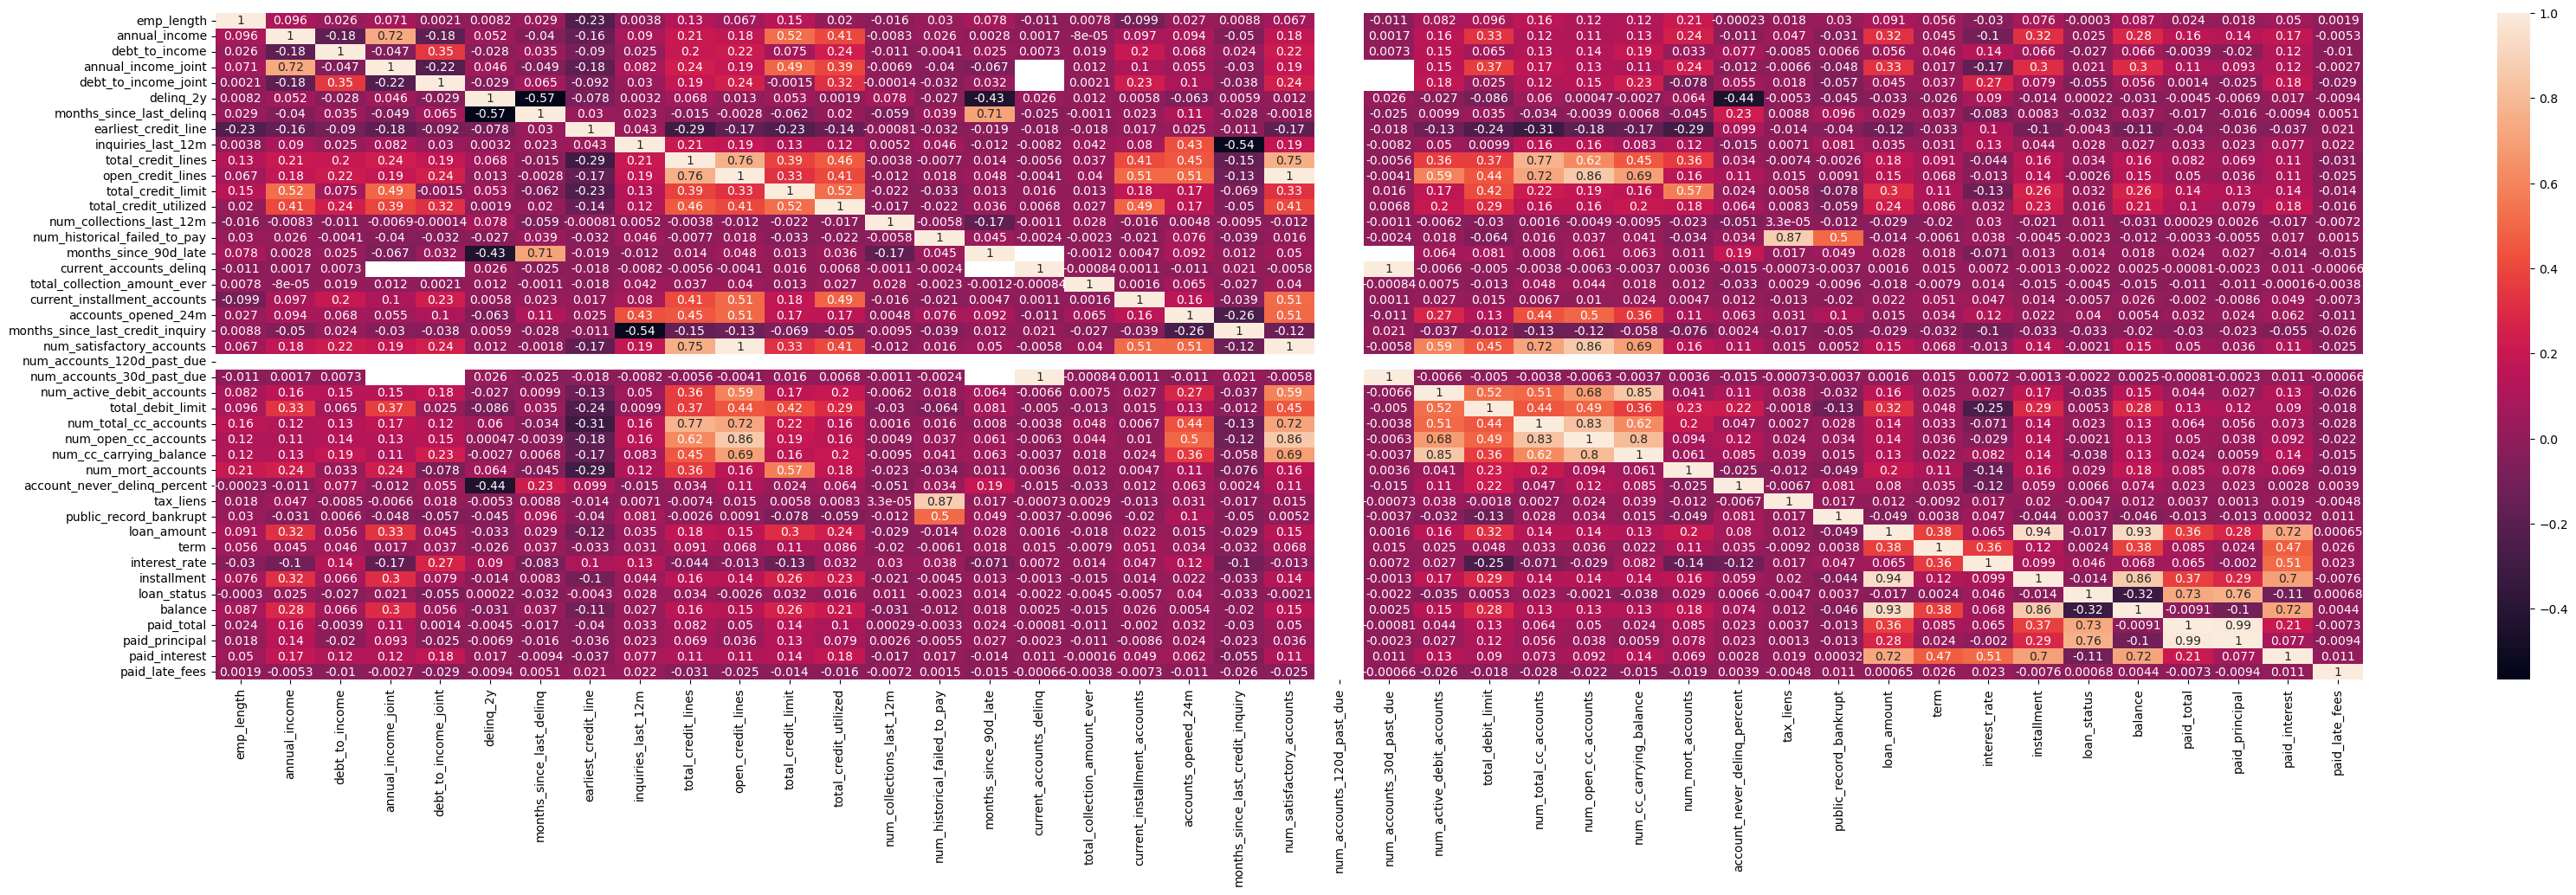

In [95]:
f, ax = plt.subplots(figsize=(40, 10))
corr = loans_df.corr()
sns.heatmap(corr, annot=True)

In [97]:
loans_df.corr()

/tmp/ipykernel_1360/212318756.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  loans_df.corr()


,emp_length,annual_income,debt_to_income,annual_income_joint,debt_to_income_joint,delinq_2y,months_since_last_delinq,earliest_credit_line,inquiries_last_12m,total_credit_lines,...,loan_amount,term,interest_rate,installment,loan_status,balance,paid_total,paid_principal,paid_interest,paid_late_fees
emp_length,1.000000,0.096469,0.026157,0.071282,0.002103,0.008242,0.028790,-0.234408,0.003753,0.133472,...,0.091255,0.056243,-0.029621,0.075981,-0.000305,0.086768,0.024246,0.018153,0.049517,0.001851
annual_income,0.096469,1.000000,-0.180445,0.724664,-0.179790,0.052236,-0.040392,-0.156001,0.090119,0.210163,...,0.324665,0.044843,-0.099584,0.315693,0.025225,0.280170,0.162005,0.141893,0.174154,-0.005318
debt_to_income,0.026157,-0.180445,1.000000,-0.047284,0.348912,-0.027517,0.034637,-0.089700,0.025388,0.198647,...,0.056329,0.046490,0.141653,0.066408,-0.026769,0.065996,-0.003918,-0.020116,0.121160,-0.010110
annual_income_joint,0.071282,0.724664,-0.047284,1.000000,-0.215504,0.046276,-0.049124,-0.175325,0.082176,0.240166,...,0.330607,0.017057,-0.165327,0.303795,0.021132,0.302291,0.108933,0.092761,0.120788,-0.002689
debt_to_income_joint,0.002103,-0.179790,0.348912,-0.215504,1.000000,-0.029220,0.065376,-0.091637,0.029515,0.187683,...,0.045363,0.037234,0.266417,0.079405,-0.055117,0.055566,0.001389,-0.025166,0.177931,-0.028840
delinq_2y,0.008242,0.052236,-0.027517,0.046276,-0.029220,1.000000,-0.566551,-0.078109,0.003152,0.068040,...,-0.033258,-0.025936,0.090456,-0.013724,0.000219,-0.031440,-0.004490,-0.006857,0.017165,-0.009404
months_since_last_delinq,0.028790,-0.040392,0.034637,-0.049124,0.065376,-0.566551,1.000000,0.030064,0.022727,-0.014727,...,0.029247,0.036953,-0.082930,0.008274,-0.032170,0.036517,-0.017350,-0.016431,-0.009362,0.005123
earliest_credit_line,-0.234408,-0.156001,-0.089700,-0.175325,-0.091637,-0.078109,0.030064,1.000000,0.042745,-0.294621,...,-0.117749,-0.032736,0.103635,-0.100001,-0.004317,-0.107508,-0.040281,-0.036125,-0.037027,0.020522
inquiries_last_12m,0.003753,0.090119,0.025388,0.082176,0.029515,0.003152,0.022727,0.042745,1.000000,0.210433,...,0.034653,0.030506,0.131193,0.043704,0.027949,0.026550,0.032823,0.023155,0.077204,0.022404
total_credit_lines,0.133472,0.210163,0.198647,0.240166,0.187683,0.068040,-0.014727,-0.294621,0.210433,1.000000,...,0.179275,0.091341,-0.044435,0.157548,0.034380,0.158414,0.082315,0.068932,0.112342,-0.030621


I chose this model as it can show the different correlations between the different columns including loan status. Thereby, it can help to predict whether a person can pay their loan or not.